
# Линейная регрессия


In [1688]:
from sklearn import preprocessing # для нормализации
from sklearn.linear_model import LinearRegression # Класс для осуществления регрессии
from sklearn.model_selection import train_test_split # Разделение данных на тестовые и тренировочные

import numpy as np # Работа с данными
import pandas as pd
import matplotlib.pyplot as plt # Строим графики

import seaborn as sns # Для визуализации данных
import statsmodels.api as sm # Альтернативный способ создания регрессии.
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import RANSACRegressor


*Загружаем датасет*

In [1689]:
dataset = pd.read_csv("./Indexes_by_year.csv", delimiter = ",")

**Анализируем датафрейм**

In [1690]:
dataset

,Rank,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,Year
0,1,Switzerland,190.82,110.96,78.65,74.47,131.75,8.42,28.73,20.09,80.05,2021
1,2,Denmark,190.01,94.73,73.28,79.96,91.67,6.66,28.69,20.40,81.8,2021
2,3,Netherlands,183.31,83.89,72.78,75.76,78.64,7.35,27.81,25.28,87.11,2021
3,4,Finland,182.79,89.05,72.99,76.40,77.46,8.64,28.96,11.86,56.64,2021
4,5,Austria,182.37,78.23,74.77,78.40,75.49,10.40,25.68,19.20,77.79,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
684,47,Russia,-7.39,44.05,49.43,35.52,69.37,14.41,47.83,104.67,-,2012
685,48,Ukraine,-14.61,27.22,44.61,40.28,51.68,16.68,33.00,100.24,-,2012
686,49,Egypt,-22.17,27.17,55.69,65.74,50.77,11.81,59.00,125.71,-,2012
687,50,Iran,-35.23,46.38,48.14,43.40,54.32,12.48,73.50,131.85,-,2012


In [1691]:
print(dataset.dtypes) # Отбираем только числовые показатели, не имеющие null
print(pd.isnull(dataset).any())

Rank                                int64
Country                            object
Quality of Life Index             float64
Purchasing Power Index            float64
Safety Index                      float64
Health Care Index                 float64
Cost of Living Index              float64
Property Price to Income Ratio    float64
Traffic Commute Time Index        float64
Pollution Index                   float64
Climate Index                      object
Year                                int64
dtype: object
Rank                              False
Country                           False
Quality of Life Index             False
Purchasing Power Index            False
Safety Index                      False
Health Care Index                 False
Cost of Living Index              False
Property Price to Income Ratio    False
Traffic Commute Time Index        False
Pollution Index                   False
Climate Index                     False
Year                              False
dt

In [1692]:
# Удаляем лишние столбцы и разделяем данные на целевые и характеристики.
# intFilter = np.array(dataset[[
#                              "Rank",
#                              "Purchasing Power Index",
#                              "Safety Index",
#                              "Health Care Index",
#                              "Cost of Living Index",
#                              "Property Price to Income Ratio",
#                              "Traffic Commute Time Index",
#                              "Pollution Index"]
#                              ])

data = dataset.drop(["Quality of Life Index", "Country", "Climate Index", "Year"], axis=1) # Удаляем ненужные столбцы из датасета

# Разделим данные на целевые и характеристики.
X = data # data
Y = dataset["Quality of Life Index"] # target

data

,Rank,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index
0,1,110.96,78.65,74.47,131.75,8.42,28.73,20.09
1,2,94.73,73.28,79.96,91.67,6.66,28.69,20.40
2,3,83.89,72.78,75.76,78.64,7.35,27.81,25.28
3,4,89.05,72.99,76.40,77.46,8.64,28.96,11.86
4,5,78.23,74.77,78.40,75.49,10.40,25.68,19.20
...,...,...,...,...,...,...,...,...
684,47,44.05,49.43,35.52,69.37,14.41,47.83,104.67
685,48,27.22,44.61,40.28,51.68,16.68,33.00,100.24
686,49,27.17,55.69,65.74,50.77,11.81,59.00,125.71
687,50,46.38,48.14,43.40,54.32,12.48,73.50,131.85


*Визуализируем данные*

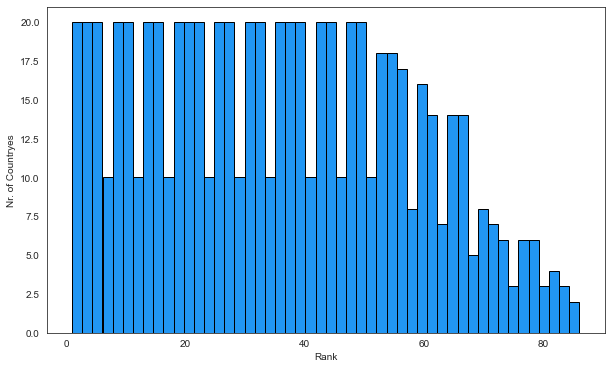

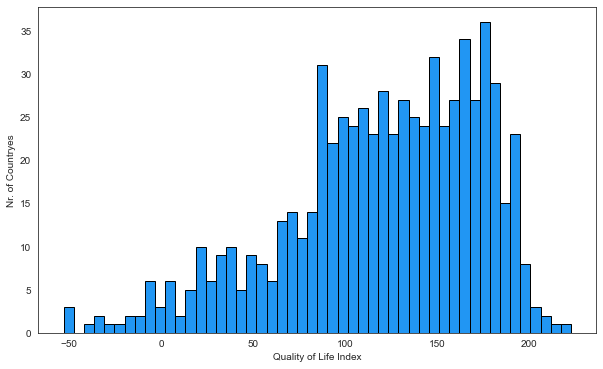

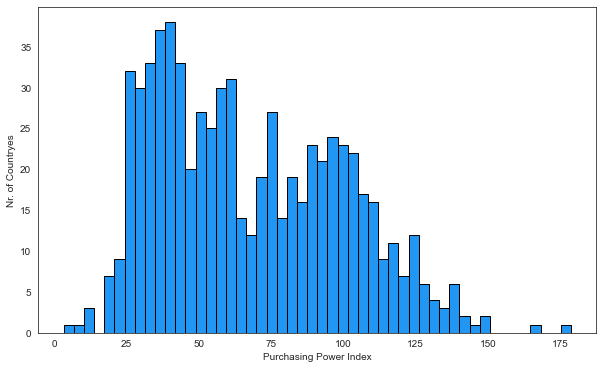

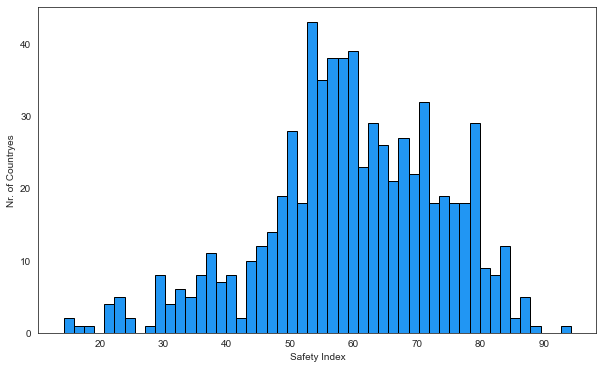

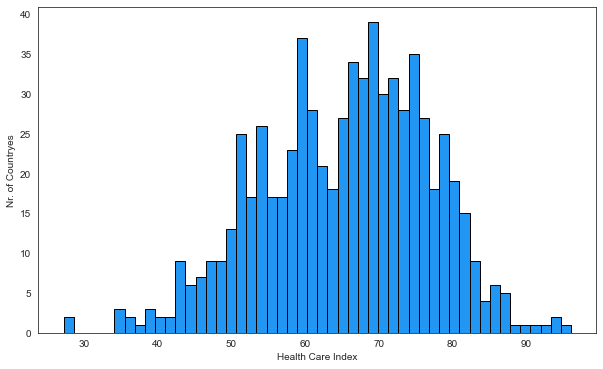

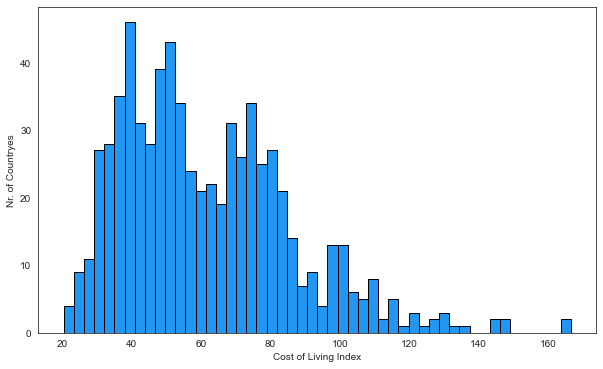

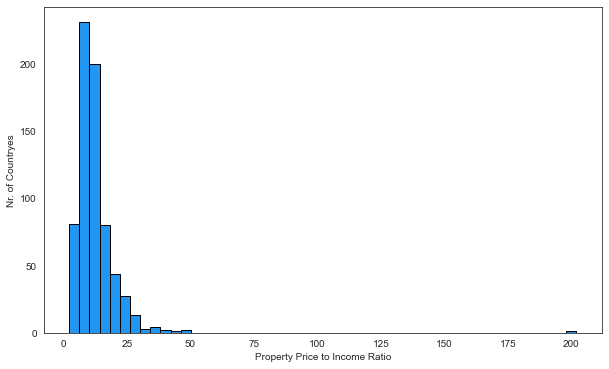

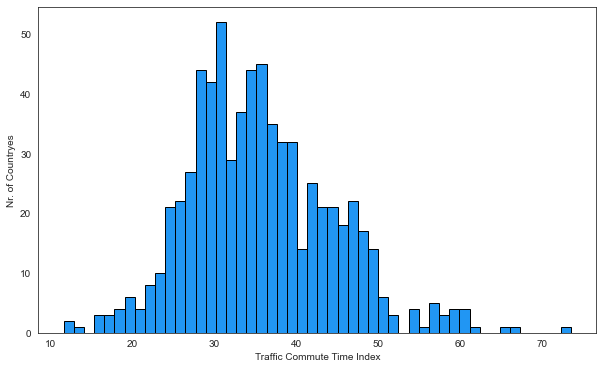

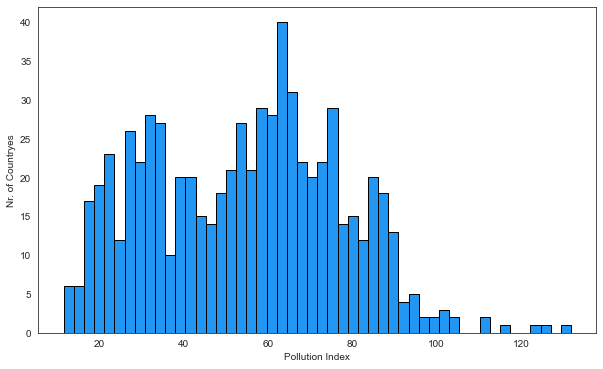

In [1693]:
# Просмотрим кол-во странн по индексу
def viewTarget(trg, x_label, y_label):
    plt.figure(figsize=(10, 6))
    plt.hist(trg, bins = 50, ec='black', color = '#2196f3')
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.show()

# Проанализируем графики параметров.
data_on_view = dataset.drop(["Country", "Climate Index", "Year" ], axis= 1)
for x in data_on_view.columns:
    viewTarget(data_on_view[x], x, 'Nr. of Countryes')

***Трансформируем рейтинги***

In [1694]:
data_on_view["Rank"].skew()

0.20981360042525019

In [1695]:
rank_log = np.log(data_on_view['Rank'])
rank_log.tail

<bound method NDFrame.tail of 0      0.000000
1      0.693147
2      1.098612
3      1.386294
4      1.609438
         ...   
684    3.850148
685    3.871201
686    3.891820
687    3.912023
688    3.931826
Name: Rank, Length: 689, dtype: float64>

In [1696]:
rank_log.skew() # Искажение

-1.3910208021291979

C:\Users\kuzin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


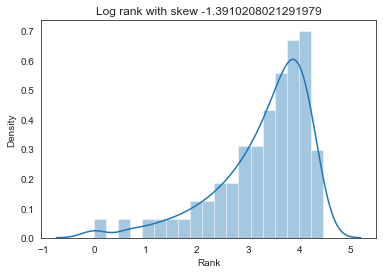

In [1697]:
sns.distplot(rank_log)
plt.title(f'Log rank with skew {rank_log.skew()}')
plt.show()

In [1698]:
# Поменяем рейтинги на логаримы
X["Rank"] = rank_log
print(X["Rank"])
print(rank_log)

0      0.000000
1      0.693147
2      1.098612
3      1.386294
4      1.609438
         ...   
684    3.850148
685    3.871201
686    3.891820
687    3.912023
688    3.931826
Name: Rank, Length: 689, dtype: float64
0      0.000000
1      0.693147
2      1.098612
3      1.386294
4      1.609438
         ...   
684    3.850148
685    3.871201
686    3.891820
687    3.912023
688    3.931826
Name: Rank, Length: 689, dtype: float64


**Нормализуем нашу банду**

In [1699]:
min_max_scaler = preprocessing.MinMaxScaler() # Создаем объект для нормализации
# Нормализуем по мин-макс
X = min_max_scaler.fit_transform(X)
# Y = min_max_scaler.fit_transform(Y.values.reshape(-1, 1))
# Y = Y.values

*Multivaribale Regression*

***Пробуем обучить***

*Training & Test Dataset Split*

In [1700]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, random_state = 42)

In [1701]:
my_regr = LinearRegression()

my_regr.fit(X_train, y_train)

print("Training data r-squared:", my_regr.score(X_train, y_train))
print("Test data r-squared:", my_regr.score(X_test, y_test))

print("Intercept", my_regr.intercept_)
# index_data = data_on_view.drop('Quality of Life Index', axis = 1).columns

pd.DataFrame(data = my_regr.coef_[0], index = data.columns, columns=['coef'])


Training data r-squared: 0.8407054815890146
Test data r-squared: 0.7821072052255316
Intercept 134.9765087815851


,coef
Rank,-22.907153
Purchasing Power Index,-22.907153
Safety Index,-22.907153
Health Care Index,-22.907153
Cost of Living Index,-22.907153
Property Price to Income Ratio,-22.907153
Traffic Commute Time Index,-22.907153
Pollution Index,-22.907153


**Кореляции**

In [1702]:
# Пробуем пандовскую корреляцию
# data_corr = dataset.drop(["Country", "Climate Index", "Year"], axis= 1)
data.corr()

,Rank,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index
Rank,1.000000,-0.770335,-0.429618,-0.482771,-0.652671,0.360374,0.440686,0.717205
Purchasing Power Index,-0.770335,1.000000,0.374062,0.468873,0.622491,-0.392783,-0.307387,-0.552010
Safety Index,-0.429618,0.374062,1.000000,0.356506,0.287818,-0.085765,-0.353736,-0.381642
Health Care Index,-0.482771,0.468873,0.356506,1.000000,0.423169,-0.150185,-0.113404,-0.419307
Cost of Living Index,-0.652671,0.622491,0.287818,0.423169,1.000000,-0.202771,-0.270436,-0.494146
Property Price to Income Ratio,0.360374,-0.392783,-0.085765,-0.150185,-0.202771,1.000000,0.237864,0.252518
Traffic Commute Time Index,0.440686,-0.307387,-0.353736,-0.113404,-0.270436,0.237864,1.000000,0.425217
Pollution Index,0.717205,-0.552010,-0.381642,-0.419307,-0.494146,0.252518,0.425217,1.000000


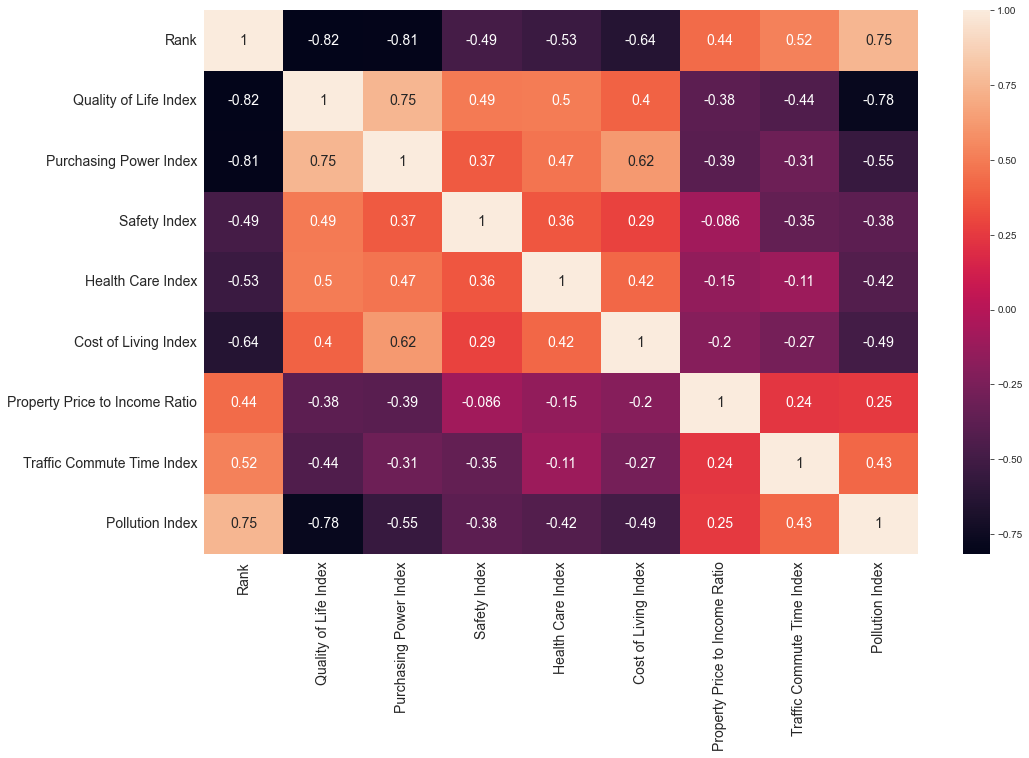

In [1703]:
# Визуализируем матрицу с помощью библиотки seaborn
plt.figure(figsize = (16, 10))
sns.heatmap(dataset.drop(["Country", "Climate Index", "Year"], axis=1).corr(), annot=True, annot_kws={"size": 14})
sns.set_style("white")
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [1704]:
# Коррелируем данные numpy-способом(рез-ты идентичны)

# dt_coef = np.around(np.corrcoef(np.array([X[:, 0], X[:, 1], X[:, 2], X[:, 3], X[:, 4], X[:, 5], X[:, 6], X[:, 7], Y[:, 0]])), decimals=4) # С нормирование Y
dt_coef = np.around(np.corrcoef(np.array([X[:, 0], X[:, 1], X[:, 2], X[:, 3], X[:, 4], X[:, 5], X[:, 6], X[:, 7], Y])), decimals=4) # Без нормирование Y
print(dt_coef)
print(all(map(lambda x: all(map(lambda y: y > 0.11 or y < -0.11, x)), dt_coef)))

[[ 1.     -0.7703 -0.4296 -0.4828 -0.6527  0.3604  0.4407  0.7172 -0.7538]
 [-0.7703  1.      0.3741  0.4689  0.6225 -0.3928 -0.3074 -0.552   0.7502]
 [-0.4296  0.3741  1.      0.3565  0.2878 -0.0858 -0.3537 -0.3816  0.4896]
 [-0.4828  0.4689  0.3565  1.      0.4232 -0.1502 -0.1134 -0.4193  0.4969]
 [-0.6527  0.6225  0.2878  0.4232  1.     -0.2028 -0.2704 -0.4941  0.3988]
 [ 0.3604 -0.3928 -0.0858 -0.1502 -0.2028  1.      0.2379  0.2525 -0.382 ]
 [ 0.4407 -0.3074 -0.3537 -0.1134 -0.2704  0.2379  1.      0.4252 -0.438 ]
 [ 0.7172 -0.552  -0.3816 -0.4193 -0.4941  0.2525  0.4252  1.     -0.7803]
 [-0.7538  0.7502  0.4896  0.4969  0.3988 -0.382  -0.438  -0.7803  1.    ]]
False


In [1705]:

# Рисуем график кареляции.
def printCoef(x, y, predict):
    ig, axs = plt.subplots(figsize=(8, 8))
    plt.title(f'Коэф. корреляции: {np.corrcoef(x, y)[0][1]}')
    axs.scatter(x , y , color='blue', alpha=0.6)
    axs.plot(x, predict, color = 'red', linewidth = 3 )
    # axs.plot(x,k_p*X+b_p, color='red')
    plt.show()

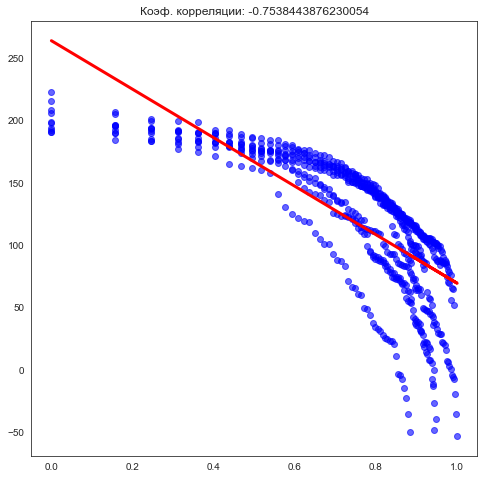

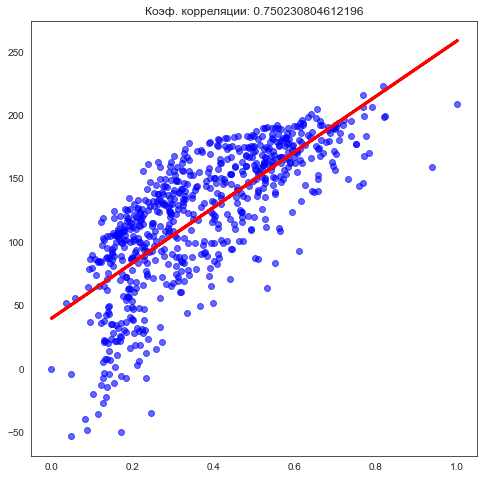

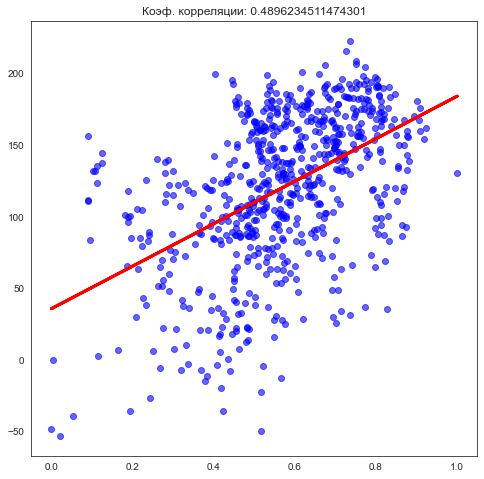

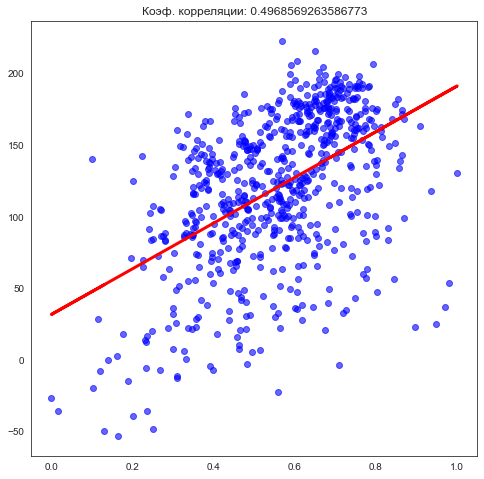

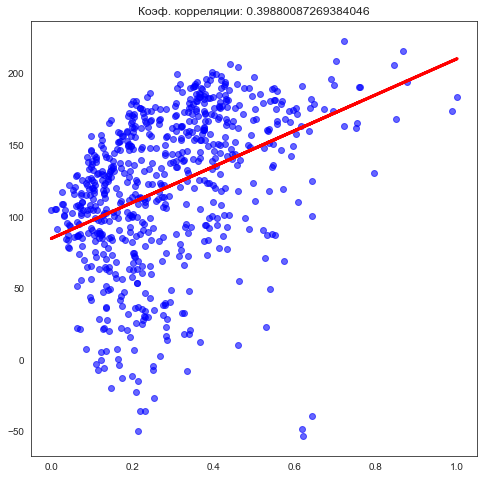

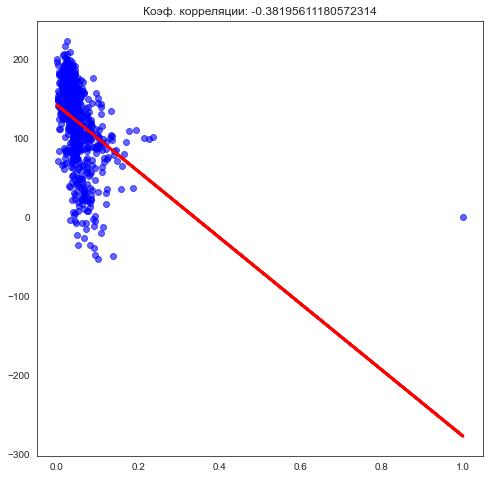

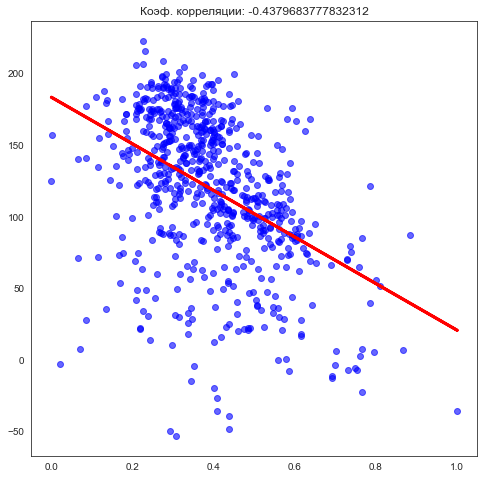

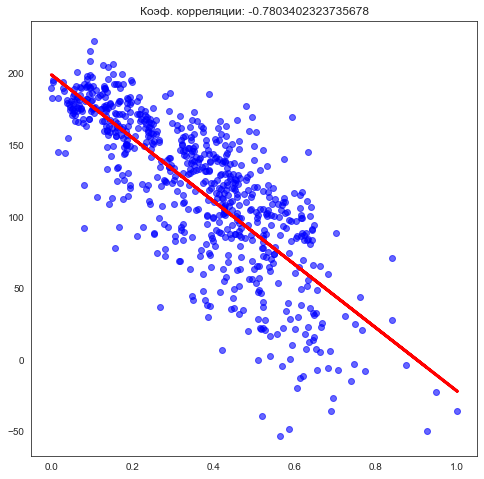

In [1706]:

# Применяем линейную регрессию для построения прямой для просмотра корреляции.
model = LinearRegression()

for i in range(X.shape[1]):
    model.fit(X[:,i].reshape(-1,1), Y)
    # printCoef(X[:,i], Y[:, 0], model.predict(X[:,i].reshape(-1,1))) # С нормировкой Y
    # print(model.score(X[:,i].reshape(-1,1), Y[:, 0])) # С нормировкой Y
    printCoef(X[:,i], Y, model.predict(X[:,i].reshape(-1,1))) # Без




***Пробуем RANSAC***

In [1707]:
def print_RANSAC(x, y, name):

    ransac = RANSACRegressor(LinearRegression(), max_trials = 150, min_samples = 50, random_state = 0, residual_threshold = 100) # Без
    ransac.fit(x.reshape(-1,1), y.reshape(-1,1))

    regr = LinearRegression()
    regr.fit(x.reshape(-1,1), y.reshape(-1,1))

    print('Наклон: %.3f' % ransac.estimator_.coef_[0])
    print('Пересечение: %.3f' % ransac.estimator_.intercept_)

    from sklearn.preprocessing import PolynomialFeatures

    poly_regr = PolynomialFeatures(degree = 2)
    X_poly = poly_regr.fit_transform(x.reshape(-1, 1))

    lin_reg2 = LinearRegression()
    lin_reg2.fit(X_poly, y)

    x_new = np.array([i*(x.max() - x.min())/100 + x.min() for i in np.arange(100)])

    # Полиноминальная реггрессия
    plt.figure(figsize=(10, 7))
    plt.plot(x_new.reshape(-1, 1), lin_reg2.predict(poly_regr.fit_transform(x_new.reshape(-1, 1))), color = "orange")

    #axs.scatter(X, y, color='black')
    # Точки
    plt.scatter(x[ransac.inlier_mask_], y[ransac.inlier_mask_], color='b',)
    plt.scatter(x[np.logical_not(ransac.inlier_mask_)], y[np.logical_not(ransac.inlier_mask_)], color='g',alpha=0.6)

    line_X = np.arange(0, 1, 0.01)
    # RANSAC
    line_y_ransac = ransac.predict(line_X[:, np.newaxis])
    plt.plot(line_X, line_y_ransac, color='red')

    # Линейная регрессия
    plt.plot(x, regr.predict(x.reshape(-1, 1)), color='y')
    plt.title(name + " vs Quality of Life Index")
    plt.show()

    return ransac.inlier_mask_

Наклон: -187.878
Пересечение: 260.619


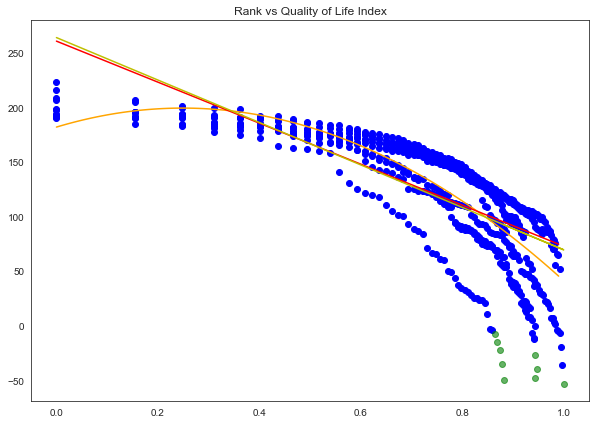

Наклон: 209.619
Пересечение: 44.640


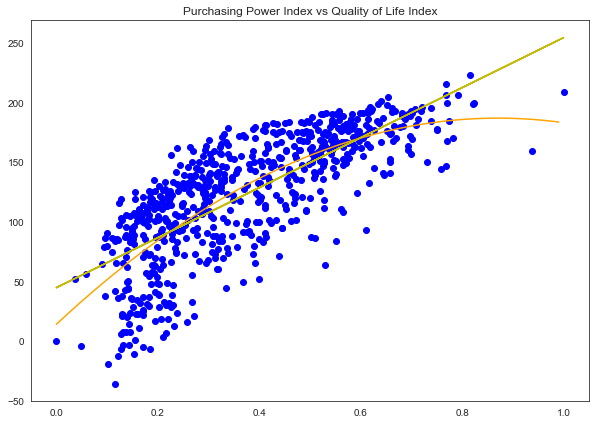

Наклон: 134.026
Пересечение: 46.448


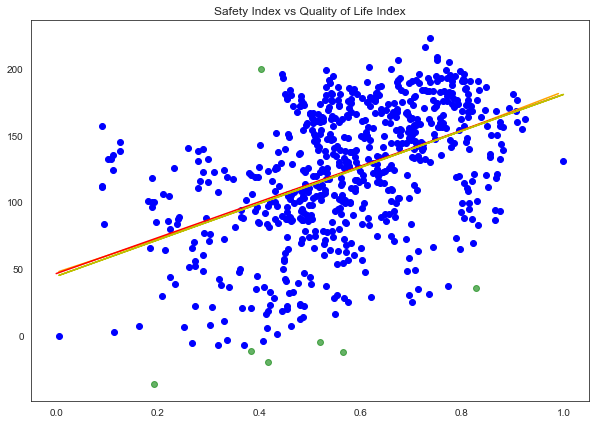

Наклон: 153.504
Пересечение: 39.652


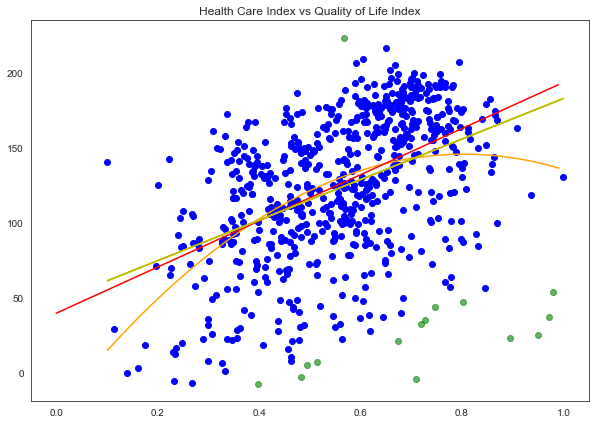

Наклон: 128.585
Пересечение: 90.891


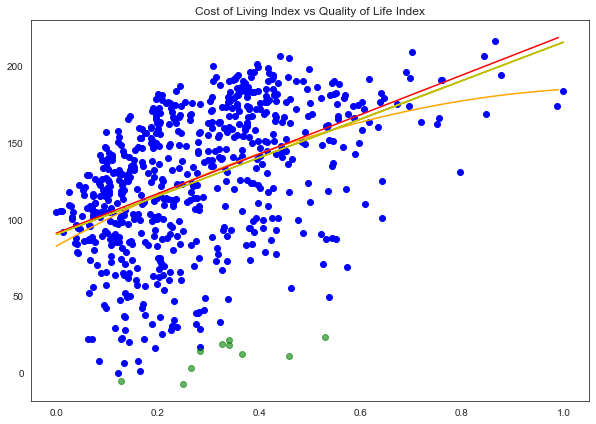

Наклон: -727.004
Пересечение: 162.514


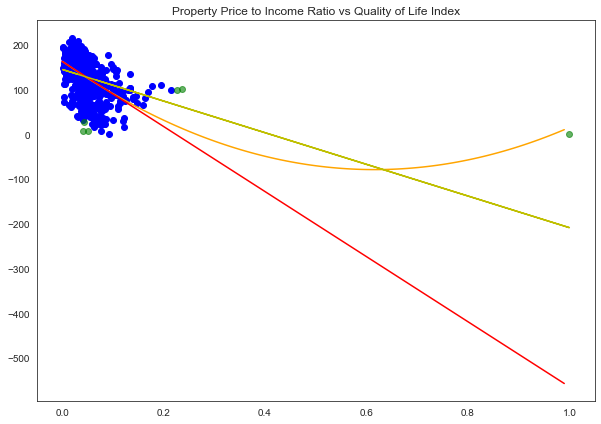

Наклон: -150.322
Пересечение: 186.649


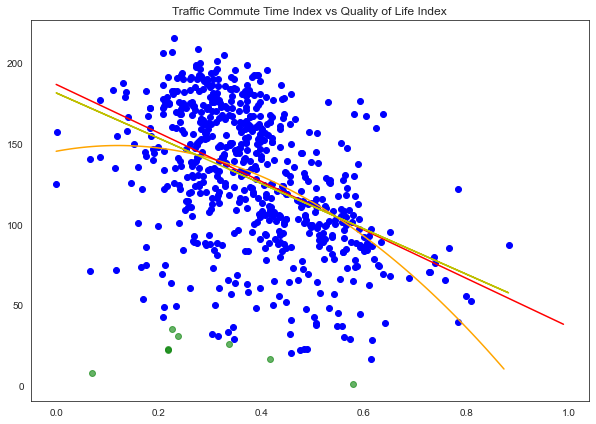

Наклон: -183.671
Пересечение: 190.811


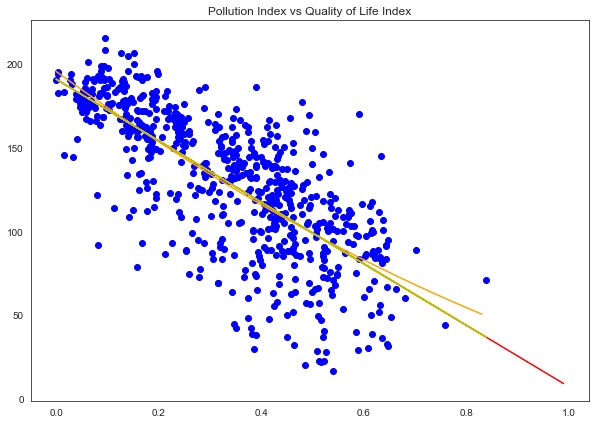

In [1708]:
x_bool = np.array([False for i in range(X.shape[0])])
y_bool = np.array([False for i in range(X.shape[0])])


for i in range(X.shape[1]):
    # ransac_good_point = print_RANSAC(X[:,i], Y[:, 0], data.columns[i]) # С нормировкой Y
    ransac_good_point = print_RANSAC(X[:,i], Y.values, data.columns[i]) # Без

    # Удаляем плохие точки из последовательности.
    X = X[ransac_good_point]
    Y = Y[ransac_good_point]

***Пробуем обучить после удаления шумов***

*Training & Test Dataset Split*

In [1709]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, random_state = 42)

In [1710]:
my_regr = LinearRegression()

my_regr.fit(X_train, y_train)

print("Training data r-squared:", my_regr.score(X_train, y_train))
print("Test data r-squared:", my_regr.score(X_test, y_test))

print("Intercept", my_regr.intercept_)
# index_data = data_on_view.drop('Quality of Life Index', axis = 1).columns

pd.DataFrame(data = my_regr.coef_[0], index = data.columns, columns=['coef'])


Training data r-squared: 0.7950601680816545
Test data r-squared: 0.809020357466405
Intercept 159.63811539568437


,coef
Rank,-49.012375
Purchasing Power Index,-49.012375
Safety Index,-49.012375
Health Care Index,-49.012375
Cost of Living Index,-49.012375
Property Price to Income Ratio,-49.012375
Traffic Commute Time Index,-49.012375
Pollution Index,-49.012375


***Проверка важности параметров***

p-value
VIF (Мультиколлениарность)

In [1711]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

pd.DataFrame({'coef': results.params, 'p-value': np.around(results.pvalues, decimals=3)})


,coef,p-value
const,159.638115,0.000
x1,-49.012375,0.000
x2,97.274092,0.000
x3,27.662378,0.000
x4,35.228196,0.000
x5,-75.952135,0.000
x6,-154.537588,0.000
x7,-20.822975,0.014
x8,-96.516112,0.000


Traffic Commute Time Index - имеет очень большой p-values, поэтому берем его на заметку

***Мультикоринеарность (насколько параметр связан с другими параметрами)***

In [1712]:
variance_inflation_factor(exog = X_incl_const, exog_idx = 1)

4.331884584155005

In [1713]:
vif = [variance_inflation_factor(exog = X_incl_const,
                                 exog_idx= i) for i in range(X_incl_const.shape[1])]

pd.DataFrame({"vif": np.around(vif, 2)})

,vif
0,127.13
1,4.33
2,2.66
3,1.50
4,1.55
5,2.03
6,1.75
7,1.45
8,2.10


Все данные проходят валидацию(меньше 10), но стоит присмотреться к Rank, так как больше 5

***Пробуем обучить*** Пробуем удалить "Traffic Commute Time Index"

*Training & Test Dataset Split*

In [1714]:

X_train, X_test, y_train, y_test = train_test_split(np.delete(X, [5, 6], axis = 1), Y, train_size = 0.7, random_state = 10)

In [1715]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

org_coef = pd.DataFrame({'coef': results.params, 'p-value': np.around(results.pvalues, decimals = 3)})

print(X)
print("BIC is", results.bic)
org_coef

[[0.         0.61354695 0.80487805 ... 0.03112023 0.27591784 0.07098919]
 [0.15561139 0.52101032 0.73771107 ... 0.0223145  0.2752709  0.07356608]
 [0.24663822 0.4592052  0.73145716 ... 0.02576675 0.26103833 0.11413134]
 ...
 [0.77092938 0.36706768 0.36310194 ... 0.05218392 0.42277212 0.61454697]
 [0.77805696 0.19801585 0.69080675 ... 0.04202732 0.21025392 0.65419784]
 [0.78496519 0.33468271 0.50106316 ... 0.03802472 0.59291606 0.75943475]]
BIC is 3955.7547719211943


,coef,p-value
const,163.138464,0.000
x1,-63.221170,0.000
x2,105.695150,0.000
x3,25.354781,0.000
x4,21.238920,0.005
x5,-73.824691,0.000
x6,-104.325721,0.000


In [1716]:
my_regr = LinearRegression()

my_regr.fit(X_train, y_train)

print("Training data r-squared:", my_regr.score(X_train, y_train))
print("Test data r-squared:", my_regr.score(X_test, y_test))

print("Intercept", my_regr.intercept_)


Training data r-squared: 0.7826860772028381
Test data r-squared: 0.8065568777385651
Intercept 163.13846390714863


***Residuals & Residual Plots***

*Возводим в квадрат разницу ошибки(предсказанного рез-та и правильного), складываем и делим на их кол-во*

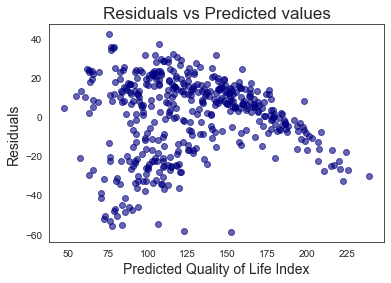

In [1717]:
# Using Statsmodel
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Residuals vs Predicted values
plt.scatter(x = results.fittedvalues, y = results.resid, c = 'navy', alpha = 0.6)

plt.xlabel('Predicted Quality of Life Index', fontsize = 14)
plt.ylabel('Residuals', fontsize = 14)
plt.title('Residuals vs Predicted values', fontsize = 17)

plt.show()

C:\Users\kuzin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


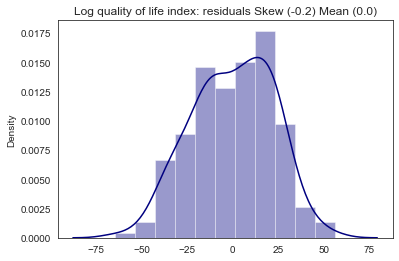

In [1718]:
# Distribution of Residuals (log prices) - checking for normality
# Modified model: transromed (using log prices) & simplified (dropping two features)
q_index = data_on_view['Quality of Life Index']
features = data.drop(["Traffic Commute Time Index", 'Property Price to Income Ratio'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(features, q_index, test_size = 0.7, random_state=10)

# Using Statsmodel
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.distplot(results.resid, color = 'navy')

plt.title(f'Log quality of life index: residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

***Кроссвалидация***

*Делим датасет на части и проверяем обучение относительно друг друга*

In [1719]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(my_regr, np.delete(X, [3, 5, 6], axis = 1), Y, cv = 5)

# Смотрим точность и отклонение.
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
scores

0.68 accuracy with a standard deviation of 0.08


array([0.61125957, 0.75115351, 0.76106216, 0.71259737, 0.56043649])

***Пробуем полиноминальную регрессию***

In [1720]:
from sklearn.preprocessing import PolynomialFeatures

X_train, X_test, y_train, y_test = train_test_split(np.delete(X, [5, 6], axis = 1), Y, train_size = 0.7, random_state = 10)

poly_regr = PolynomialFeatures(degree = 2)
X_poly = poly_regr.fit_transform(X_train)

lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, y_train)

# Полиноминальная реггрессия.
print("Polynomial Regression:")
print("Training data r-squared:", lin_reg2.score(poly_regr.fit_transform(X_train), y_train))
print("Test data r-squared:", lin_reg2.score(poly_regr.fit_transform(X_test), y_test))

print("Intercept", lin_reg2.intercept_ , "\n")

# Линейная регрессия
print("Linear Regression:")
print("Training data r-squared:", my_regr.score(X_train, y_train))
print("Test data r-squared:", my_regr.score(X_test, y_test))

print("Intercept", my_regr.intercept_)

Polynomial Regression:
Training data r-squared: 0.8389306771092421
Test data r-squared: 0.8269920776962205
Intercept 266.69097896474466 

Linear Regression:
Training data r-squared: 0.7826860772028381
Test data r-squared: 0.8065568777385651
Intercept 163.13846390714863


In [1721]:
# Пробуем нашу модель.
# Для нормарованной(X) регрессии

print("q of l i: ", lin_reg2.predict(poly_regr.fit_transform(X_test)))

print("l reg: ", my_regr.predict(X_test))
y_test

q of l i:  [193.99485203  45.87099234 191.37912832 190.33763338  84.44138868
 197.08984202 147.53229795  85.07294235 186.66257508 188.95275491
 172.18909008 125.18495136 129.12777637 106.30754866 169.37603994
 145.84285013 152.6801331  112.57766792 172.2021479  148.05771577
 170.99339578 122.31632062 163.39476452  85.2755134  151.58458547
 135.96590839 150.36756769 106.42205098 143.8742984  132.36487694
 133.34263495 103.4218982  105.54052991 191.68214244 142.9011009
 149.51376575 151.57495502  85.32844406 134.90382538 139.34447477
 108.34957955  86.65026982  98.49595138 190.1291339  147.22165844
 165.14323095 146.43173798 177.91535511 186.29548606 170.70064776
 202.02942163 115.83752901  77.9939552  192.82930792 112.2029011
 167.68347417 129.7587037   55.54211534 137.45481457  72.94381805
 105.06794779 134.31394225  89.08898641 133.57140902 136.21767785
 124.34478432 123.2882796   76.14052233 164.91607821 186.22250831
 154.41281735 145.59016694  44.3613867  144.95317282 189.66562481
 

574    191.36
488     28.38
418    195.94
364    199.70
57     108.47
        ...  
618     63.68
475     49.87
180    170.32
394    141.61
282    112.15
Name: Quality of Life Index, Length: 191, dtype: float64